<h3><b>This notebook contains the generalized mixed effects models for the perseverative error hypothesis test</b></h3>
<p>It details the both the model selection procedure and the final hypothesis test</p>
<li>Selecting best fitting probability function for the generalized model (gamma or inverse gaussian)
<li>Selecting the best fitting link function for the model (log, identity or inverse)
<li>Selecting the best fitting random effects structure for the model (random intercepts and by-participant random slopes - as was done in the original analyses)
<li>Selecting the best fitting covariate structure (age, sex, working memory)
<p>This will be done by comparing model fit with BIC scores (as before)</p>
<p>Results will then be reported for only the <b>best fitting model</b></p>
<br>
<p>NB this notebook is run in r (rather than python - as previous analysis notebooks were) - due to better implementation of generalized mixed effects models in r </p>

In [22]:
library(tidyverse)
library(lme4)
library(ggplot2)
task_summary <- read.csv("U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/dem_vids_task_excluded.csv")

In [23]:
#transform variable to all be above 0
task_summary$pos_perseverative_er <- task_summary$mean_perseverative_er + 0.01 ##+0.01 as all values must be positive (i.e., can't have 0s)

Determine best link and probability function for this model
<p>NB any commented out models failed to converge

In [25]:
##firstly we test whether model should use a gamma or inverse gaussian probability function
##and whether the link function should be identity or inverse
gamma_log <- glmer(pos_perseverative_er ~ block_type + (1|participant_no), data=task_summary, family=Gamma(link="log"))
gamma_inverse <- glmer(pos_perseverative_er ~ block_type + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))
#gamma_identity <- glmer(pos_perseverative_er ~ block_type + (1|participant_no), data=task_summary, family=Gamma(link="identity"))

#invgaus_log <- glmer(pos_perseverative_er ~ block_type + (1|participant_no), data=task_summary, family=inverse.gaussian(link="log"))
invgaus_inverse <- glmer(pos_perseverative_er ~ block_type + (1|participant_no), data=task_summary, family=inverse.gaussian(link="inverse"))
invgaus_identity <- glmer(pos_perseverative_er ~ block_type + (1|participant_no), data=task_summary, family=inverse.gaussian(link="identity"))

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



                        Model      BIC
2             Gamma (inverse) 1611.950
1                 Gamma (log) 1616.091
3  Inverse gaussian (inverse) 2759.641
4 Inverse gaussian (identity) 2759.641


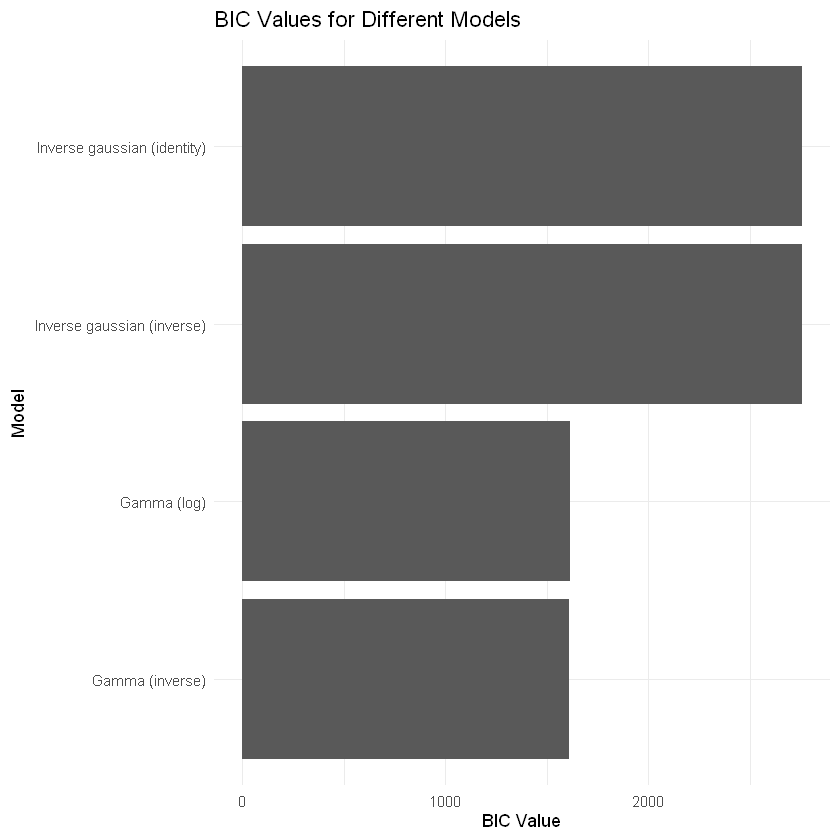

In [26]:
bic_values <- c(
  BIC(gamma_log),
  BIC(gamma_inverse),
  BIC(invgaus_inverse),
  BIC(invgaus_identity)
)
model_names <- c("Gamma (log)", "Gamma (inverse)", "Inverse gaussian (inverse)", "Inverse gaussian (identity)")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df) #gamma inverse wins

<p>Next, we will determine the best random effects structure (as done before in the Python noteooks)</p>

In [27]:
basic_model <- glmer(pos_perseverative_er ~ block_type + (1|participant_no), data=task_summary, family=Gamma(link="inverse"))

feedback_randint <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))
fractals_randint <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + (1|fractals), data=task_summary, family=Gamma(link="inverse"))
feedback_fractals_randint <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + (1|fractals) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))

#randslope <- glmer(pos_perseverative_er ~ block_type + (block_type|participant_no), data=task_summary, family=Gamma(link="inverse"))
#feedback_randint_randslope <- glmer(pos_perseverative_er ~ block_type + (block_type|participant_no) + (1|feedback_details), data=task_summary, family=Gamma(link="inverse"))
feedback_fractals_randint_randslope <- glmer(pos_perseverative_er ~ block_type + (block_type|participant_no) + (1|feedback_details) + (1|fractals), data=task_summary, family=Gamma(link="inverse"))

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



                                Model      BIC
1                         basic model 1611.950
3                    fractals_randint 1618.877
2                    feedback_randint 1618.877
4           feedback_fractals_randint 1625.805
5 feedback_fractals_randint_randslope 1660.220


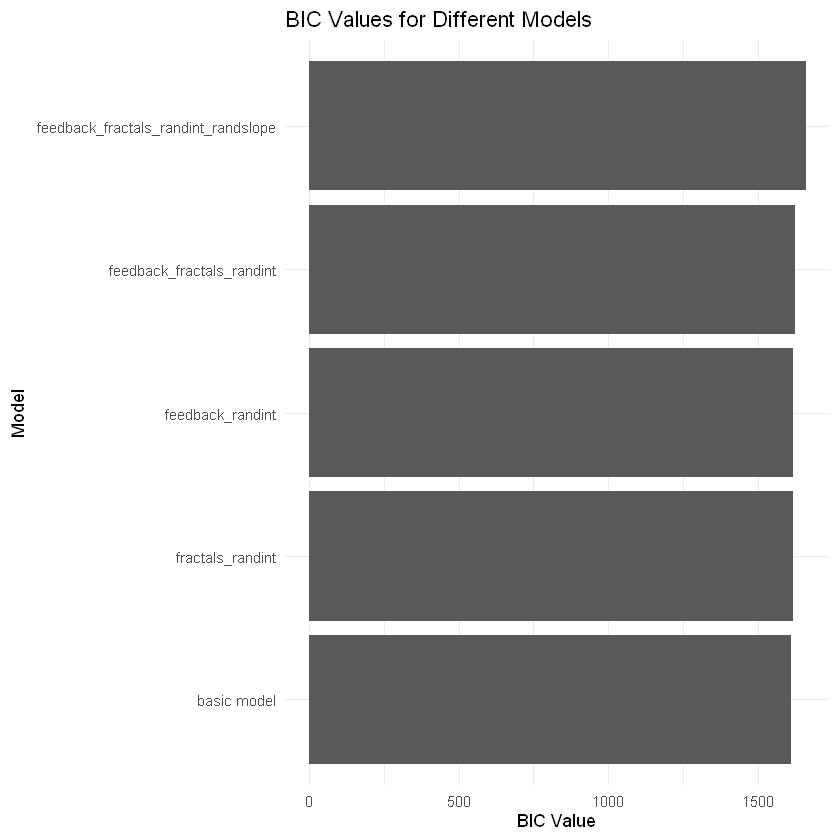

In [28]:
bic_values <- c(
  BIC(basic_model),
  BIC(feedback_randint),
  BIC(fractals_randint),
  BIC(feedback_fractals_randint),
  BIC(feedback_fractals_randint_randslope)
)
model_names <- c("basic model", "feedback_randint", "fractals_randint", "feedback_fractals_randint", "feedback_fractals_randint_randslope")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df) ##basic model is the best fit

The basic model is the best fit, so now we will identify the best covariate structure for this model

In [29]:
no_covariate <- basic_model
sex_covariate <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + prolific_sex, data=task_summary, family=Gamma(link="inverse"))
#age_covariate <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + prolific_age, data=task_summary, family=Gamma(link="inverse"))
#digit_span_covariate <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + digit_span, data=task_summary, family=Gamma(link="inverse"))
#sex_age_covariate <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + prolific_sex + prolific_age, data=task_summary, family=Gamma(link="inverse"))
sex_digit_span_covariate <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + prolific_sex + digit_span, data=task_summary, family=Gamma(link="inverse"))
#digit_span_age_covariate <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + prolific_age + digit_span, data=task_summary, family=Gamma(link="inverse"))
#sex_digit_span_age_covariate <- glmer(pos_perseverative_er ~ block_type + (1|participant_no) + prolific_age + prolific_sex + digit_span, data=task_summary, family=Gamma(link="inverse"))

                     Model      BIC
1             no_covariate 1611.950
2            sex_covariate 1618.780
3 sex_digit_span_covariate 1625.445


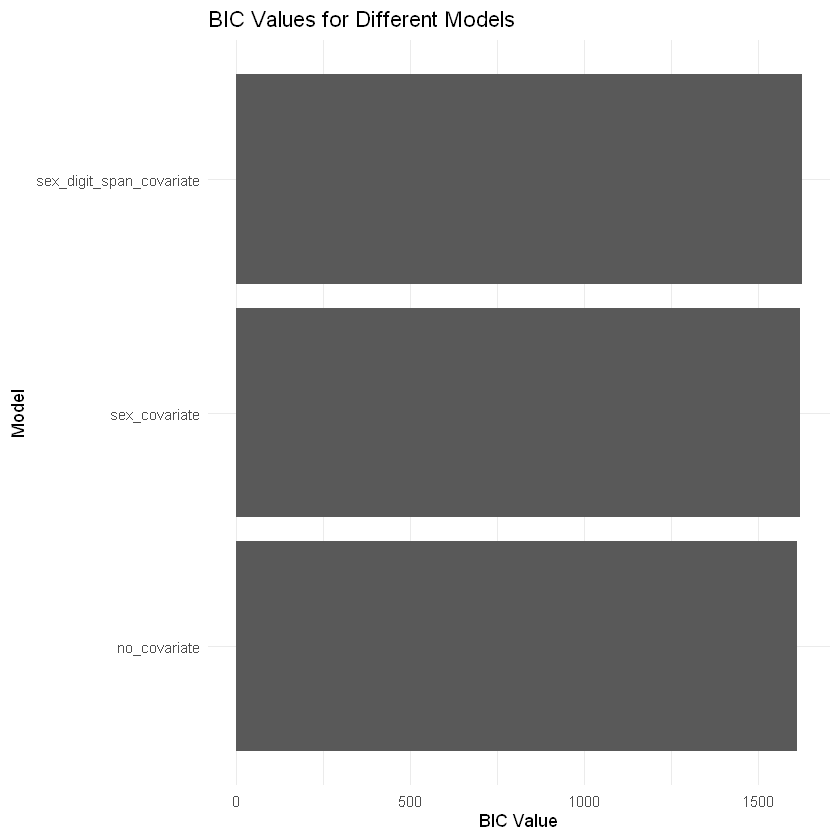

In [30]:
bic_values <- c(
  BIC(no_covariate),
  BIC(sex_covariate),
  BIC(sex_digit_span_covariate)
)
model_names <- c("no_covariate", "sex_covariate", "sex_digit_span_covariate")

bic_df <- data.frame(Model = model_names, BIC = bic_values)

bic_df <- bic_df[order(bic_df$BIC), ]

# Plot the BIC values
ggplot(bic_df, aes(x = reorder(Model, BIC), y = BIC)) +
  geom_bar(stat = "identity") + 
  labs(title = "BIC Values for Different Models",
       x = "Model",
       y = "BIC Value") +
  theme_minimal() +
  coord_flip() 
print(bic_df)

Hypothesis test with the best fitting model

In [31]:
summary(no_covariate)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: Gamma  ( inverse )
Formula: pos_perseverative_er ~ block_type + (1 | participant_no)
   Data: task_summary

     AIC      BIC   logLik deviance df.resid 
  1587.3   1611.9   -788.7   1577.3     1015 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2647 -0.7161 -0.1944  0.5332  3.8144 

Random effects:
 Groups         Name        Variance Std.Dev.
 participant_no (Intercept) 0.1441   0.3796  
 Residual                   0.6133   0.7831  
Number of obs: 1020, groups:  participant_no, 340

Fixed effects:
                 Estimate Std. Error t value Pr(>|z|)    
(Intercept)       1.32174    0.07274  18.172   <2e-16 ***
block_typeFear    0.13312    0.07953   1.674   0.0942 .  
block_typePoints  0.18930    0.08252   2.294   0.0218 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) blck_F
block_typFr -0.503